In [ ]:
# Import the requests library.
import requests
import matplotlib.pyplot as plt
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress
import numpy as np
from citipy import citipy
import pandas as pd
import time
from datetime import datetime
from config import weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [ ]:
lats = np.random.uniform(low=-90.000, high=90.000, size = 1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [ ]:
#add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [ ]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
              citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

In [ ]:
from citipy import citipy
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

In [ ]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mahanje,-9.9333,35.3333,66.04,89,100,2.19,TZ,2022-12-21 04:12:31
1,Khandyga,62.6667,135.6000,-27.98,99,71,0.96,RU,2022-12-21 04:12:32
2,San Patricio,28.0170,-97.5169,55.83,76,100,9.86,US,2022-12-21 04:12:32
3,Victoria,22.2855,114.1577,69.24,46,100,11.99,HK,2022-12-21 04:09:25
4,Hofn,64.2539,-15.2082,33.60,71,100,39.44,IS,2022-12-21 04:12:33
5,Tuatapere,-46.1333,167.6833,64.31,55,24,10.60,NZ,2022-12-21 04:12:33
6,Hermanus,-34.4187,19.2345,57.79,69,7,13.82,ZA,2022-12-21 04:12:34
7,Puerto Ayora,-0.7393,-90.3518,71.55,96,45,4.92,EC,2022-12-21 04:12:34
8,Upernavik,72.7868,-56.1549,8.71,96,100,14.34,GL,2022-12-21 04:12:34
9,Salalah,17.0151,54.0924,70.88,28,76,12.68,OM,2022-12-21 04:12:35


In [9]:
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mahanje,TZ,2022-12-21 04:12:31,-9.9333,35.3333,66.04,89,100,2.19
1,Khandyga,RU,2022-12-21 04:12:32,62.6667,135.6000,-27.98,99,71,0.96
2,San Patricio,US,2022-12-21 04:12:32,28.0170,-97.5169,55.83,76,100,9.86
3,Victoria,HK,2022-12-21 04:09:25,22.2855,114.1577,69.24,46,100,11.99
4,Hofn,IS,2022-12-21 04:12:33,64.2539,-15.2082,33.60,71,100,39.44
5,Tuatapere,NZ,2022-12-21 04:12:33,-46.1333,167.6833,64.31,55,24,10.60
6,Hermanus,ZA,2022-12-21 04:12:34,-34.4187,19.2345,57.79,69,7,13.82
7,Puerto Ayora,EC,2022-12-21 04:12:34,-0.7393,-90.3518,71.55,96,45,4.92
8,Upernavik,GL,2022-12-21 04:12:34,72.7868,-56.1549,8.71,96,100,14.34
9,Salalah,OM,2022-12-21 04:12:35,17.0151,54.0924,70.88,28,76,12.68


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [13]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'12/20/22'

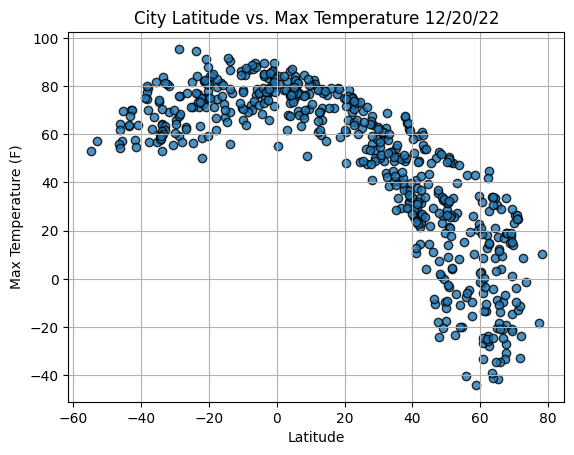

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

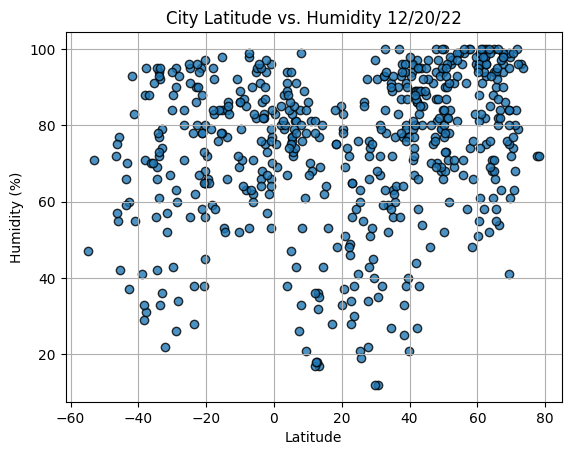

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

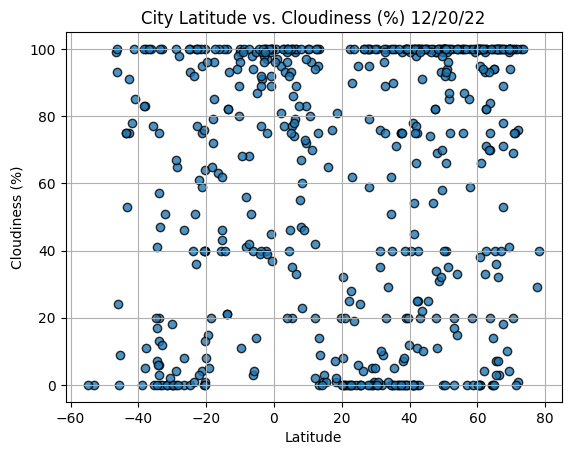

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

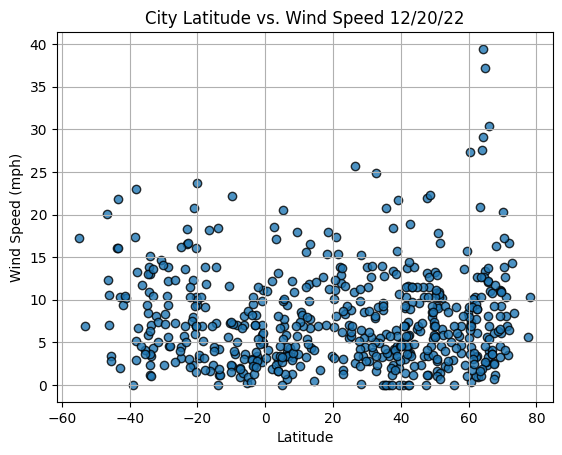

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()